**Data Preprocessing.**

dataset is uploaded to Drive : https://drive.google.com/drive/folders/1_fsg4mGsMLelnNe8CznCoJ6U2-Q5ks9l?usp=sharing

In [1]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/intelliHack/Task01/weather_data.csv')

In [2]:
data.head()

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,Rain,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,Rain,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,Rain,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,Rain,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,Rain,38.062329,1030.264331


In [3]:
list(data.columns)

['date',
 'avg_temperature',
 'humidity',
 'avg_wind_speed',
 'rain_or_not',
 'cloud_cover',
 'pressure']

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             311 non-null    object 
 1   avg_temperature  296 non-null    float64
 2   humidity         296 non-null    float64
 3   avg_wind_speed   296 non-null    float64
 4   rain_or_not      311 non-null    object 
 5   cloud_cover      296 non-null    float64
 6   pressure         311 non-null    float64
dtypes: float64(5), object(2)
memory usage: 17.1+ KB


null values in the entries are identified.



In [5]:
data.describe()

,avg_temperature,humidity,avg_wind_speed,cloud_cover,pressure
count,296.000000,296.000000,296.000000,296.000000,311.000000
mean,25.983840,55.041385,7.556636,49.834827,1001.059119
std,6.802475,19.220133,5.344683,29.009459,28.835595
min,15.000000,30.000000,0.069480,0.321826,951.240404
25%,20.265692,34.280826,3.550354,24.530951,975.757545
50%,27.177958,56.759806,7.326421,50.725120,1001.938586
75%,32.204599,72.189837,11.050627,76.046506,1026.578884
max,35.000000,90.000000,56.636041,99.834751,1049.543752


In [6]:
data.shape

(311, 7)

..........Detecting the outliers before preprocessing data...........

In [7]:
data.isna().sum()/len(data)*100

,0
date,0.000000
avg_temperature,4.823151
humidity,4.823151
avg_wind_speed,4.823151
rain_or_not,0.000000
cloud_cover,4.823151
pressure,0.000000


In [8]:
data['rain_or_not'].unique()

array(['Rain', 'No Rain'], dtype=object)

In [9]:
data['rain_or_not'] = data['rain_or_not'].map({'Rain': 1 , 'No Rain': 2})
data.head()


,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,1,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,1,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,1,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,1,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,1,38.062329,1030.264331


In [10]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')

...........Identifying outliers and resolving them..............

In [11]:
import plotly.express as px
averageTemp_fig = px.box(data, x='avg_temperature')
averageTemp_fig.show()
averageHumidity_fig = px.box(data, x='humidity')
averageHumidity_fig.show()
averageWind_fig = px.box(data, x='avg_wind_speed')
averageWind_fig.show()
averageCloud_fig = px.box(data, x='cloud_cover')
averageCloud_fig.show()
averagePressure_fig = px.box(data, x='pressure')
averagePressure_fig.show()

Ouliers can be seen in Average wind speed. Identifying outliers in Average wind speed.

In [12]:
def find_outliers_IQR(data):
 q1=data.quantile(0.25)
 q3=data.quantile(0.75)
 IQR=q3-q1
 outliers = data[((data<(q1-1.5*IQR))|(data>(q3+1.5*IQR)))]
 return outliers

outliers = find_outliers_IQR(data['avg_wind_speed'])
print("number of outliers: "+ str(len(outliers)))
outliers

number of outliers: 3


,avg_wind_speed
10,22.803513
60,56.636041
289,27.430920


In [13]:
data.drop(data.index[[10,60,289]], inplace=True)

In [14]:
outliers = find_outliers_IQR(data['avg_wind_speed'])
print("number of outliers: "+ str(len(outliers)))
outliers


number of outliers: 0


,avg_wind_speed


dealing with null values in the data set.fill null values of the averagetempurature with the mean.humidity with median and dropping the null values in subset 'rain or not'

In [15]:
data['avg_temperature'] = pd.to_numeric(data['avg_temperature'], errors='coerce')
data['avg_temperature'] = data['avg_temperature'].fillna(data['avg_temperature'].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308 entries, 0 to 310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             308 non-null    datetime64[ns]
 1   avg_temperature  308 non-null    float64       
 2   humidity         293 non-null    float64       
 3   avg_wind_speed   293 non-null    float64       
 4   rain_or_not      308 non-null    int64         
 5   cloud_cover      293 non-null    float64       
 6   pressure         308 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 19.2 KB


In [16]:
data['humidity'] = pd.to_numeric(data['humidity'], errors='coerce')
data['humidity'].fillna(data['humidity'].median())
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308 entries, 0 to 310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             308 non-null    datetime64[ns]
 1   avg_temperature  308 non-null    float64       
 2   humidity         293 non-null    float64       
 3   avg_wind_speed   293 non-null    float64       
 4   rain_or_not      308 non-null    int64         
 5   cloud_cover      293 non-null    float64       
 6   pressure         308 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 19.2 KB


In [17]:
data['cloud_cover'] = pd.to_numeric(data['cloud_cover'], errors='coerce')
data['cloud_cover'].fillna(data['cloud_cover'].median(), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308 entries, 0 to 310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             308 non-null    datetime64[ns]
 1   avg_temperature  308 non-null    float64       
 2   humidity         293 non-null    float64       
 3   avg_wind_speed   293 non-null    float64       
 4   rain_or_not      308 non-null    int64         
 5   cloud_cover      308 non-null    float64       
 6   pressure         308 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 19.2 KB


<ipython-input-17-206ad3fe8a52>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [18]:
data['avg_wind_speed'] = pd.to_numeric(data['avg_wind_speed'], errors='coerce')
data['avg_wind_speed'].fillna(data['avg_wind_speed'].median(), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308 entries, 0 to 310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             308 non-null    datetime64[ns]
 1   avg_temperature  308 non-null    float64       
 2   humidity         293 non-null    float64       
 3   avg_wind_speed   308 non-null    float64       
 4   rain_or_not      308 non-null    int64         
 5   cloud_cover      308 non-null    float64       
 6   pressure         308 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 19.2 KB


<ipython-input-18-67a6f1b69f45>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





performing Exploratory Data Analysis

In [19]:
data.describe()
data['rain_or_not'].value_counts(normalize=True) * 100

,proportion
rain_or_not,
1,63.311688
2,36.688312


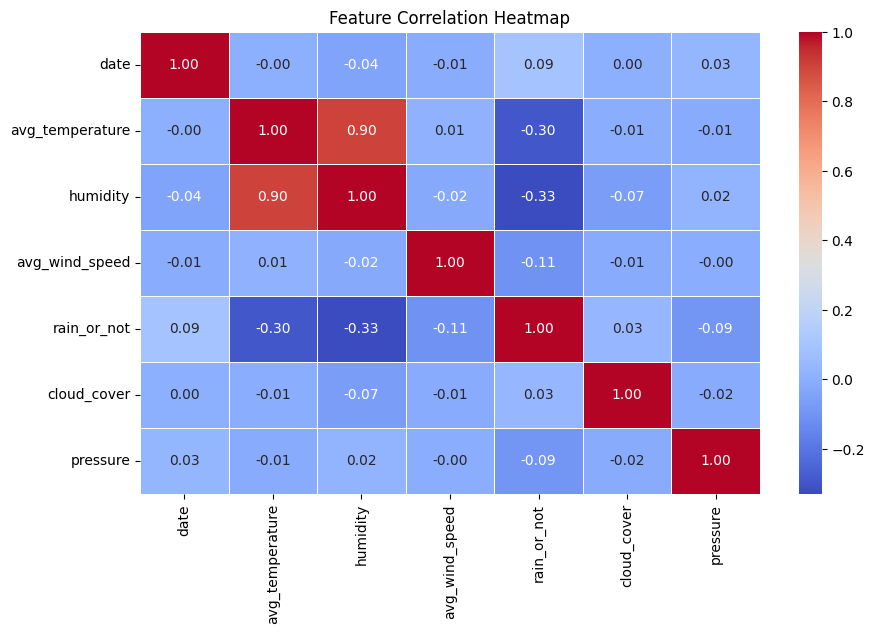

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

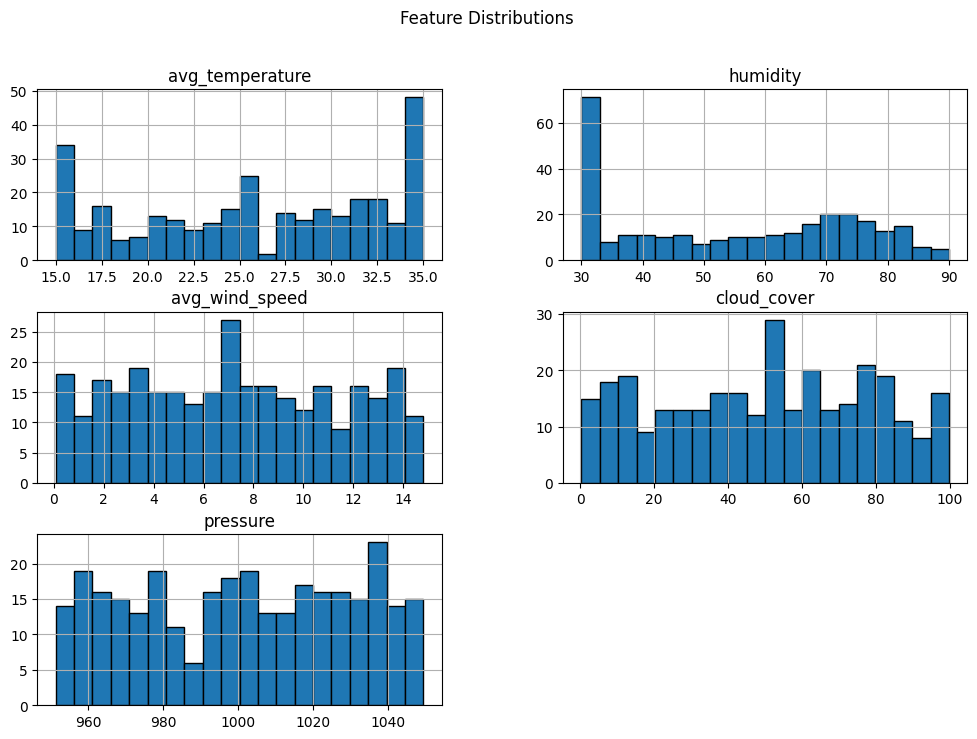

In [21]:
import matplotlib.pyplot as plt

numeric_cols = ['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover', 'pressure']
data[numeric_cols].hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

In [22]:
data.to_csv(r'/content/drive/MyDrive/intelliHack/Task01/preprocessed_weather_data.csv', index=False)

Train and evaluate machine learning models

In [23]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 94.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 91.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 89.5 MB/s eta 0:00:00
   ━━━━

In [1]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/intelliHack/Task01/preprocessed_weather_data.csv')
from pycaret.classification import *
clf_setup = setup(df, target='rain_or_not', session_id=42, normalize=True)

,Description,Value
0,Session id,42
1,Target,rain_or_not
2,Target type,Binary
3,Target mapping,"1: 0, 2: 1"
4,Original data shape,"(308, 7)"
5,Transformed data shape,"(308, 7)"
6,Transformed train set shape,"(215, 7)"
7,Transformed test set shape,"(93, 7)"
8,Numeric features,5
9,Categorical features,1


In [3]:
get_config('X_train')

,date,avg_temperature,humidity,avg_wind_speed,cloud_cover,pressure
232,2023-08-23,18.862261,35.423176,4.456826,55.422653,1030.490723
140,2023-05-23,34.107941,78.784538,2.342289,17.410934,1038.241577
131,2023-05-14,29.669355,76.262901,2.328604,1.210847,964.071167
257,2023-09-17,29.358471,72.030151,4.082177,9.299064,1039.230225
265,2023-09-25,35.000000,79.206108,2.776994,60.348766,1035.569580
...,...,...,...,...,...,...
226,2023-08-17,23.042612,39.985378,9.047281,55.508495,1041.807617
130,2023-05-13,27.076506,71.343376,8.394605,7.125673,1048.352173
224,2023-08-15,23.038799,30.000000,11.070504,80.007095,954.202454
55,2023-02-26,22.964043,47.298992,14.209250,30.327515,1047.200562


In [4]:
get_config('X_train_transformed')

,date,avg_temperature,humidity,avg_wind_speed,cloud_cover,pressure
232,1.312067,-1.040001,-0.971403,-0.679972,0.208480,1.008350
140,-0.762156,1.245225,1.250753,-1.181681,-1.137640,1.279542
131,-0.762156,0.579910,1.121525,-1.184928,-1.711338,-1.315586
257,-0.762156,0.533311,0.904608,-0.768864,-1.424908,1.314134
265,1.312067,1.378938,1.272357,-1.078540,0.382930,1.186053
...,...,...,...,...,...,...
226,-0.762156,-0.413394,-0.737602,0.409191,0.211520,1.404314
130,-0.762156,0.191259,0.869413,0.254332,-1.501875,1.633299
224,-0.762156,-0.413966,-1.249327,0.889234,1.079096,-1.660879
55,1.312067,-0.425171,-0.362799,1.633954,-0.680221,1.593006


In [5]:
get_config('y_train')

,rain_or_not
232,2
140,1
131,1
257,1
265,2
...,...
226,1
130,1
224,1
55,2


In [6]:
get_config('y_train_transformed')

,rain_or_not
232,1
140,0
131,0
257,0
265,1
...,...
226,0
130,0
224,0
55,1


checking the most suitable model for predictions.

In [7]:
best_model = compare_models(sort = 'Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6602,0.6566,0.6602,0.6122,0.5673,0.1163,0.1583,0.1290
knn,K Neighbors Classifier,0.6418,0.6353,0.6418,0.5157,0.5168,0.0370,0.0697,0.0560
svm,SVM - Linear Kernel,0.6377,0.5604,0.6377,0.5285,0.5457,0.0799,0.0968,0.0460
lr,Logistic Regression,0.6325,0.6917,0.6325,0.4002,0.4902,0.0000,0.0000,0.3750
nb,Naive Bayes,0.6325,0.5000,0.6325,0.4002,0.4902,0.0000,0.0000,0.0710
dt,Decision Tree Classifier,0.6325,0.5000,0.6325,0.4002,0.4902,0.0000,0.0000,0.0750
ridge,Ridge Classifier,0.6325,0.6872,0.6325,0.4002,0.4902,0.0000,0.0000,0.0450
rf,Random Forest Classifier,0.6325,0.6120,0.6325,0.4002,0.4902,0.0000,0.0000,0.1530
ada,Ada Boost Classifier,0.6325,0.5000,0.6325,0.4002,0.4902,0.0000,0.0000,0.0420
gbc,Gradient Boosting Classifier,0.6325,0.4982,0.6325,0.4002,0.4902,0.0000,0.0000,0.0860


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [8]:
final_model = finalize_model(best_model)

reloading the dataset,and splitting datasets into training dataset and testing dataset.

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("/content/drive/MyDrive/intelliHack/Task01/preprocessed_weather_data.csv")


imputer = SimpleImputer(strategy="mean")
df[['avg_temperature', 'humidity', 'avg_wind_speed']] = imputer.fit_transform(df[['avg_temperature', 'humidity', 'avg_wind_speed']])

X = df[['avg_temperature', 'humidity', 'avg_wind_speed']]
y = df['rain_or_not']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


Training of the classifier

In [10]:
model = ExtraTreesClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=None,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

Analytics !

In [11]:
y_pred = model.predict(X_test)

compare_results_etc_df = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
compare_results_etc_df.to_csv(r'/content/drive/MyDrive/intelliHack/Task01/etc_pred_comparison.csv', index=True)
compare_results_etc_df

,Actual,Predicted
244,2,1
296,1,2
210,1,2
162,1,1
258,1,1
...,...,...
22,1,1
156,1,1
262,2,1
253,1,1


In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.64      0.77      0.70        39
           2       0.40      0.26      0.32        23

    accuracy                           0.58        62
   macro avg       0.52      0.52      0.51        62
weighted avg       0.55      0.58      0.56        62



In [14]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print("Model Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Model Performance Metrics:
Accuracy: 0.5806
Precision: 0.6383
Recall: 0.7692
F1 Score: 0.6977


In [16]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(ExtraTreesClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Optimized Model Accuracy: {best_accuracy:.4f}")


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Optimized Model Accuracy: 0.5484


In [17]:
from pycaret.classification import save_model
save_model(best_model, "Final_Model")


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['avg_temperature', 'humidity',
                                              'avg_wind_speed', 'cloud_cover',
                                              'pressure'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=N...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='sqrt',
     